In [2]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd
from scipy.io import wavfile

import sys
sys.path.insert(0,'../')

from nnAudio import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='2'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    
batch = False
sr = 22050

In [3]:
sr, song = wavfile.read('./Bach.wav')
y_list = song.mean(1)
y_torch = torch.tensor(y_list, dtype=torch.float) # casting the array into a PyTorch Tensor

# sr, song = wavfile.read('./Chopin.wav')
# y_list = song.mean(1)
# y_torch = torch.tensor(y_list, dtype=torch.float) # casting the array into a PyTorch Tensor

/opt/conda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [4]:
torch.float

torch.float32

# Visualizing waveforms

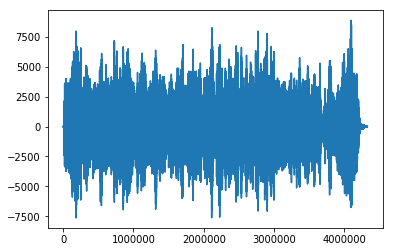

In [5]:
plt.plot(y_list)

# STFT

In [7]:
spec_layer = Spectrogram.STFT(n_fft=2048, freq_bins=None, hop_length=512, 
                              window='hann', freq_scale='linear', center=True, pad_mode='reflect', 
                              fmin=50,fmax=11025, sr=sr) # Initializing the model

t_start = time.time()
spec = spec_layer(y_torch)

print(f"time used = {time.time()-t_start:.3}")

sampling rate = 44100. Please make sure the sampling rate is correct in order to get a valid freq range
STFT kernels created, time used = 0.2734 seconds
time used = 0.0141


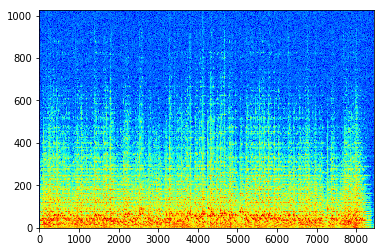

In [9]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower', cmap='jet')

# Log freq-scale STFT

In [10]:
spec_layer = Spectrogram.STFT(n_fft=2048, freq_bins=None, hop_length=512, 
                              window='hann', freq_scale='log', center=True, pad_mode='reflect', 
                              fmin=50,fmax=11025, sr=sr) # Initializing the model

t_start = time.time()
spec = spec_layer(y_torch)

print(f"time used = {time.time()-t_start:.3}")

sampling rate = 44100. Please make sure the sampling rate is correct in order to get a valid freq range
STFT kernels created, time used = 0.2646 seconds
time used = 0.00128


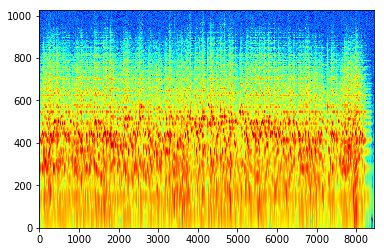

In [11]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower', cmap='jet')

# Melspectrogram

In [12]:
spec_layer = Spectrogram.MelSpectrogram(sr=sr, n_fft=2048, n_mels=128, hop_length=512,
                                        window='hann', center=True, pad_mode='reflect',
                                        htk=False, fmin=0.0, fmax=None, norm=1)

t_start = time.time()
spec = spec_layer(y_torch)

print(f"time used = {time.time()-t_start:.3}")

STFT filter created, time used = 0.2593 seconds
Mel filter created, time used = 0.0036 seconds
time used = 0.00972


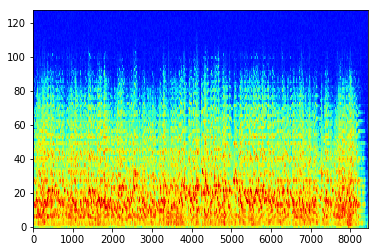

In [13]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower', cmap='jet')

# CQT1992

In [14]:
spec_layer = Spectrogram.CQT1992v2(sr=sr, hop_length=512, fmin=55, fmax=None, n_bins=84*2,
                                   bins_per_octave=24, norm=1, window='hann', center=True, pad_mode='reflect')

t_start = time.time()
spec = spec_layer(y_torch)

print(f"time used = {time.time()-t_start:.3}")

CQT kernels created, time used = 0.2215 seconds
time used = 0.000991


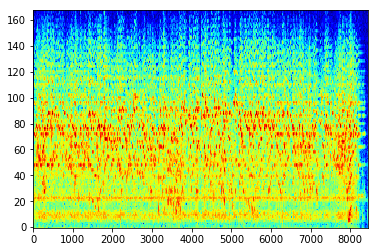

In [15]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower', cmap='jet')

# CQT2010

In [16]:
spec_layer = Spectrogram.CQT2010v2(sr=sr, hop_length=512, fmin=55, fmax=None, n_bins=84*2,
                                   bins_per_octave=24, norm=True, window='hann',
                                   pad_mode='reflect', earlydownsample=True)

t_start = time.time()
spec = spec_layer(y_torch)

print(f"time used = {time.time()-t_start:.3}")

Low pass filter created, time used = 0.0017 seconds
num_octave =  7
No early downsampling is required, downsample_factor =  1
Early downsampling filter created, time used = 0.0002 seconds
CQT kernels created, time used = 0.0114 seconds
downsample_factor =  1
time used = 0.0109


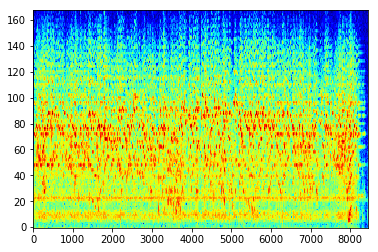

In [17]:
plt.imshow(torch.log(spec[0]+1).cpu().numpy(), aspect='auto', origin='lower', cmap='jet')